<a href="https://colab.research.google.com/github/hadeelfarash/Intermediate_ML_Project4/blob/main/Project4_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute  import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
pd.set_option("display.max_columns",200)
pd.set_option("display.max_info_rows",800)
pd.set_option("display.max_info_columns",800)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn import set_config
set_config(transform_output= "pandas")

In [26]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
    # Get the classification report
    report = classification_report(y_true, y_pred)
    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)
    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    # create a confusion matrix  of raw counts
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
    axes[0].set_title("Raw Counts")
    # create a confusion matrix with the test data
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")
    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()
    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict


def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
    # Get predictions for training data
    y_train_pred = model.predict(X_train)
    # Call the helper function to obtain regression metrics for training data
    results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
    print()
    # Get predictions for test data
    y_test_pred = model.predict(X_test)
    # Call the helper function to obtain regression metrics for test data
    results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
    if output_dict == True:
        # Store results in a dataframe if ouput_frame is True
        results_dict = {'train':results_train,
                    'test': results_test}
        return results_dict

In [27]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data

In [28]:
df = pd.read_csv("/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week17/Data/adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## About Data

**An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.**
*   The dataset contains 16 columns
*   The Number of attributes: 14
*   Target filed: Income
*   We can explore the possibility in predicting income level based on the individual’s personal information





## Explore/clean the Data

In [29]:
# Find datatypes of each column
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [30]:
# Count the duplicates
df.duplicated().sum()
# Remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [31]:
# Check for how many unique values are in each column
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   age              int64 
 1   workclass        object
 2   fnlwgt           int64 
 3   education        object
 4   educational-num  int64 
 5   marital-status   object
 6   occupation       object
 7   relationship     object
 8   race             object
 9   gender           object
 10  capital-gain     int64 
 11  capital-loss     int64 
 12  hours-per-week   int64 
 13  native-country   object
 14  income           object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [33]:
# This will give us the total number of null values (True) for each column
null_sums = df.isna().sum()
null_sums

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [34]:
# Saving list of column names for object cols
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [35]:
# Obtain the value counts for all string columns
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


Value Counts for education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64


Value Counts for marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64


Value Coun

In [36]:
# Saving list of column names for numeric cols
num_cols = df.select_dtypes('number').columns
num_cols

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

## Exploratory Visualizations

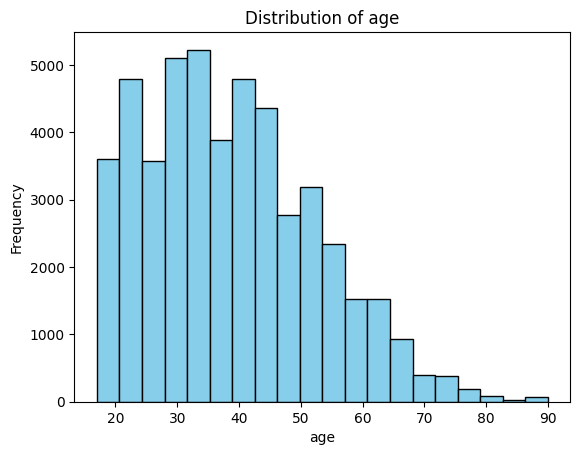

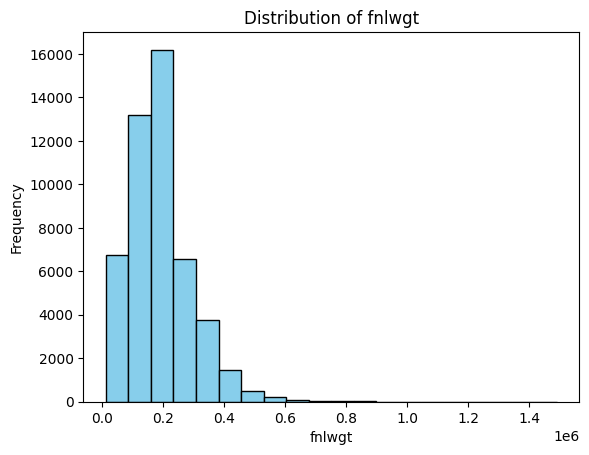

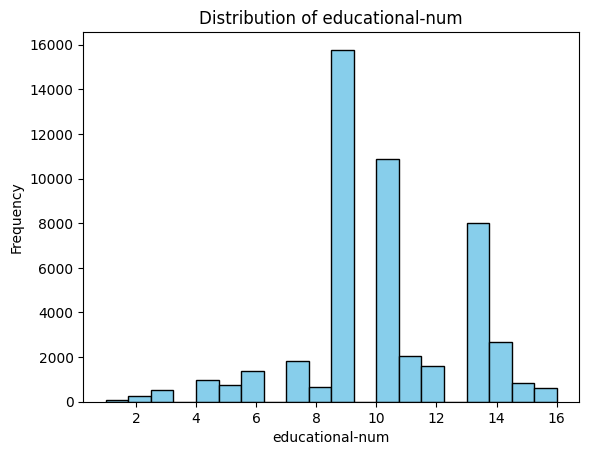

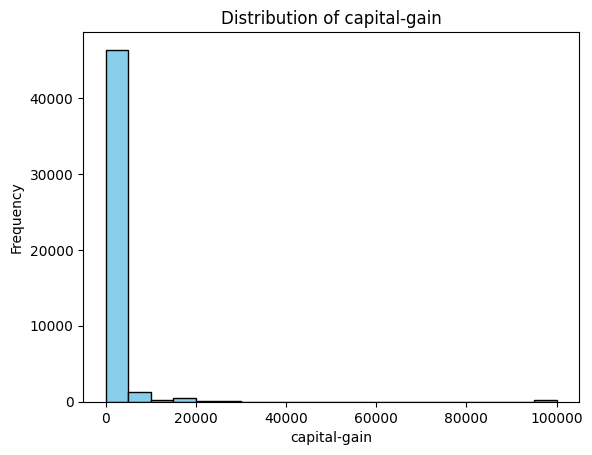

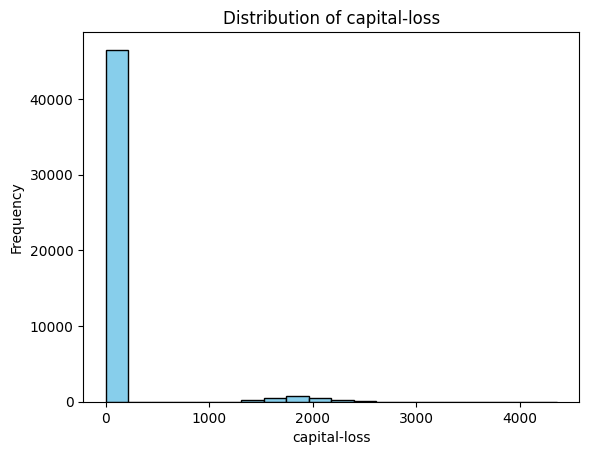

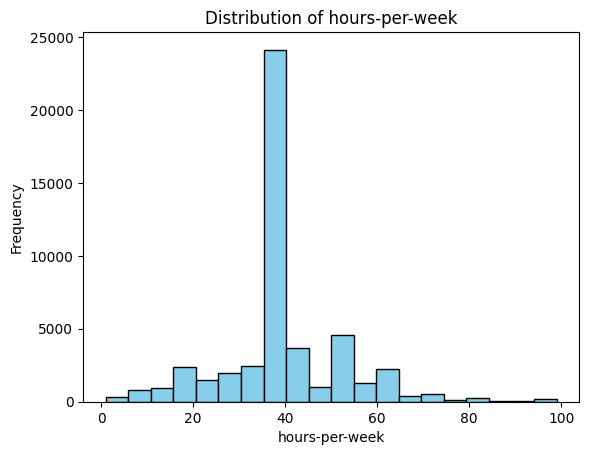

In [37]:
# Histograms for numerical columns
import matplotlib.pyplot as plt

num_cols = {'age': 'age', 'fnlwgt': 'fnlwgt', 'educational-num': 'educational-num', 'capital-gain': 'capital-gain', 'capital-loss': 'capital-loss', 'hours-per-week': 'hours-per-week'}  # Replace with your actual column names and labels

for col, label in num_cols.items():
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {label}')
    plt.xlabel(label)
    plt.ylabel('Frequency')
    plt.show()


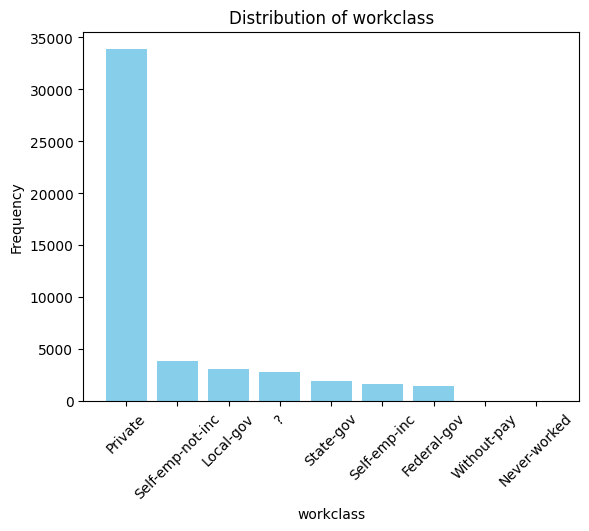

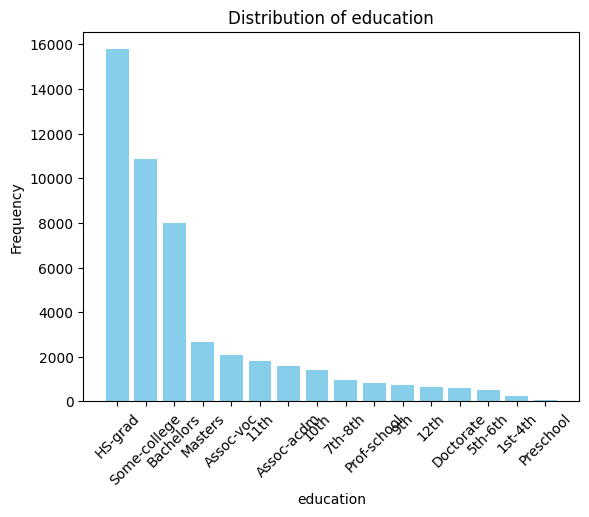

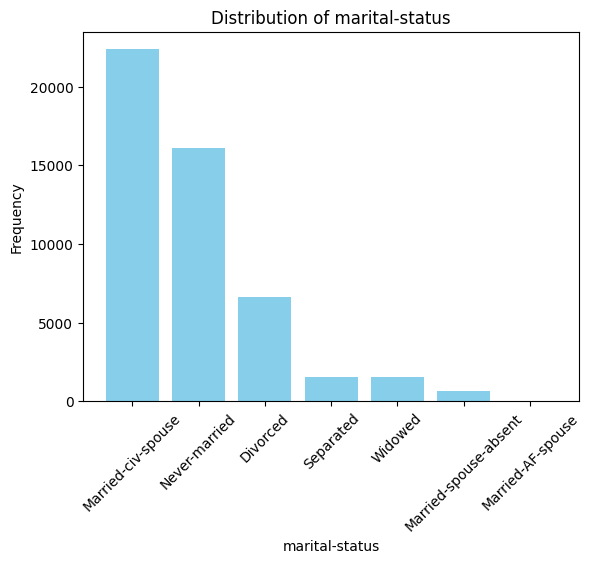

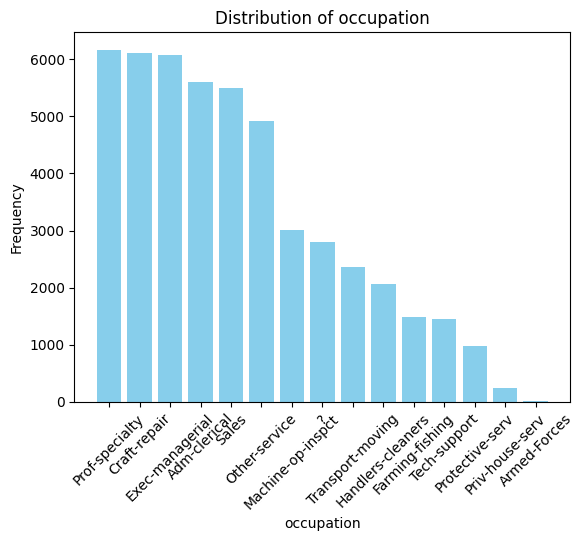

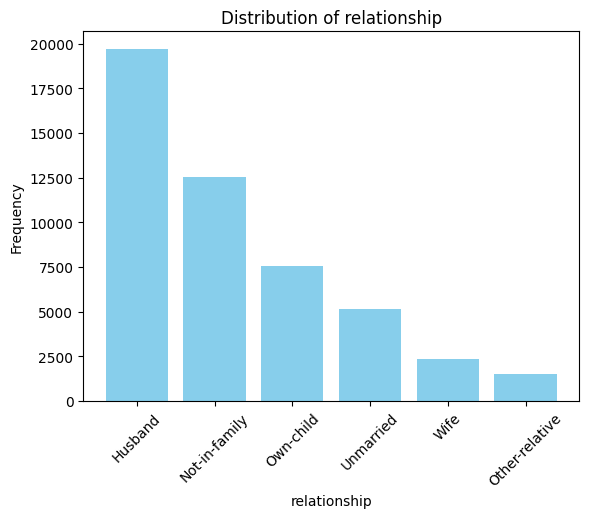

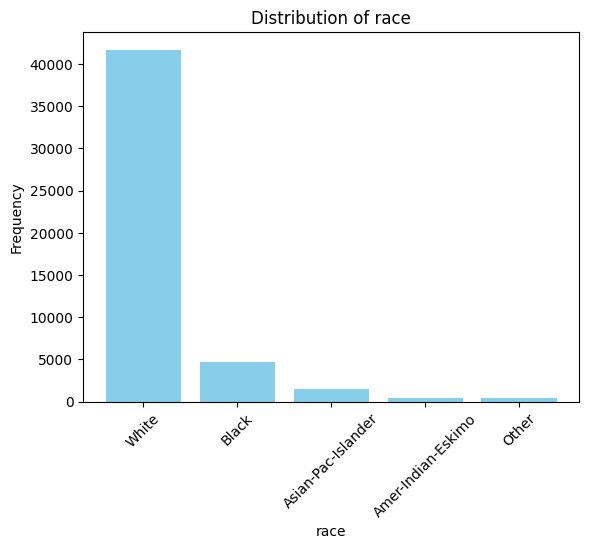

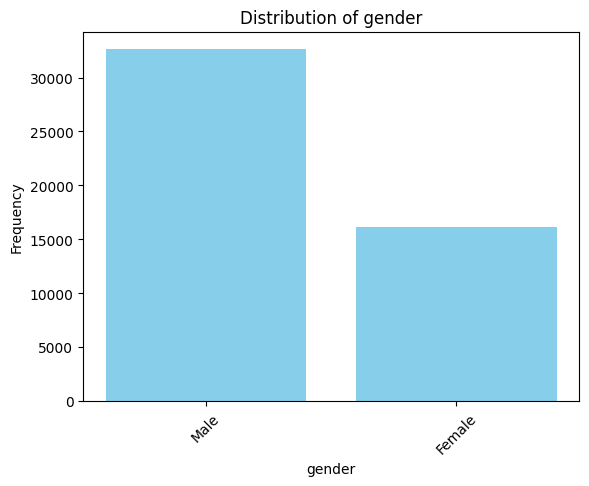

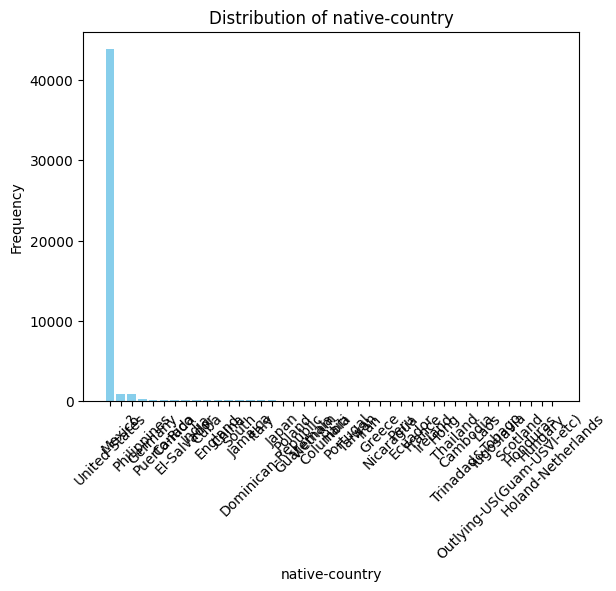

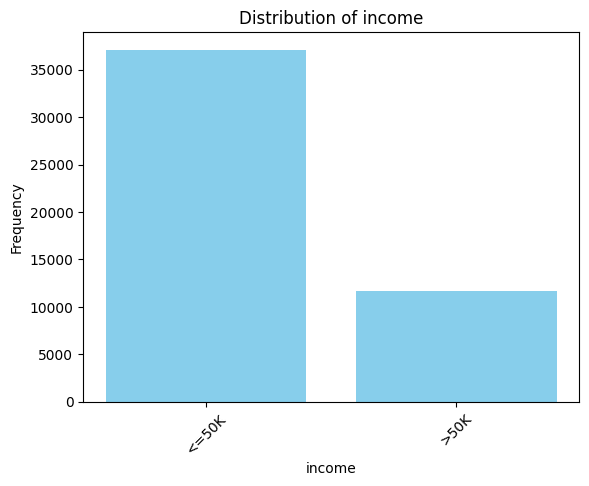

In [38]:
#Bar Chart for categorical columns:
import matplotlib.pyplot as plt

categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

for col in categorical_cols:
    category_counts = df[col].value_counts()

    plt.bar(category_counts.index, category_counts.values, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()


In [40]:
#Boxplot for 'Hours-per-Week' vs 'Income'
plt.figure(figsize=(10, 6))

sns.boxplot(x='income', y='hours-per-week', data=df, palette='Set2')
plt.title('Boxplot of Hours-per-Week vs Income')
plt.xlabel('Income')
plt.ylabel('Hours-per-Week')
plt.show()


NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

## Preprocess data

In [41]:
#Convert Target to Numeric Values / for Modeling
df['income'] = df['income'].replace({'<=50K':0, '>50K':1})

In [42]:
# Assign the target column to y
y = df['income']
# Assign the features to X (In this case we include all columns except the target column)
X = df.drop(columns = 'income')

In [43]:
# Import the TTS from sklearn
from sklearn.model_selection import train_test_split
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
y_train.value_counts(1)

In [45]:
# [ Numeric Pipeline]
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes(exclude="object").columns
print("Numeric Columns:", num_cols)
# 1) instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# 2) Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
num_pipe

Numeric Columns: Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [46]:
# 3) Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
        'hours-per-week'],
       dtype='object'))

In [47]:
# [ Categorical Pipeline]
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes(include="object").columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_pipe

OneHotEncoder Columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [48]:
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['workclass', 'education', 'marital-status', 'occupation',
        'relationship', 'race', 'gender', 'native-country'],
       dtype='object'))

In [49]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [50]:

# Fit on training data
col_transformer.fit(X_train)
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# Transform the testing data
X_test_processed = col_transformer.transform(X_test)
# View the processed training data
X_train_processed.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_?,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
38093,3.166708,0.043804,0.355778,-0.145433,-0.217031,-2.608202,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43391,-0.634069,-1.341547,1.522115,-0.145433,-0.217031,0.766978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3064,-0.780252,1.422558,-0.421779,0.264526,-0.217031,0.365171,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45606,-1.364987,-0.534230,-0.033000,-0.145433,-0.217031,-2.045672,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,

In [51]:
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# Transform the testing data
X_test_processed = col_transformer.transform(X_test)
# View the processed training data
X_train_processed.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_?,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
38093,3.166708,0.043804,0.355778,-0.145433,-0.217031,-2.608202,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43391,-0.634069,-1.341547,1.522115,-0.145433,-0.217031,0.766978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3064,-0.780252,1.422558,-0.421779,0.264526,-0.217031,0.365171,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45606,-1.364987,-0.534230,-0.033000,-0.145433,-0.217031,-2.045672,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,

In [52]:
from imblearn.over_sampling import SMOTE,SMOTENC
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train_processed, y_train)
y_train_sm.value_counts()

0    27841
1    27841
Name: income, dtype: int64

## Modeling

In [53]:
clf = RandomForestClassifier(random_state=42)

clf.fit(X_train_sm, y_train_sm)


RandomForestClassifier(random_state=42)

## Evaluate the Model

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict



def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27841
           1       1.00      1.00      1.00     27841

    accuracy                           1.00     55682
   macro avg       1.00      1.00      1.00     55682
weighted avg       1.00      1.00      1.00     55682



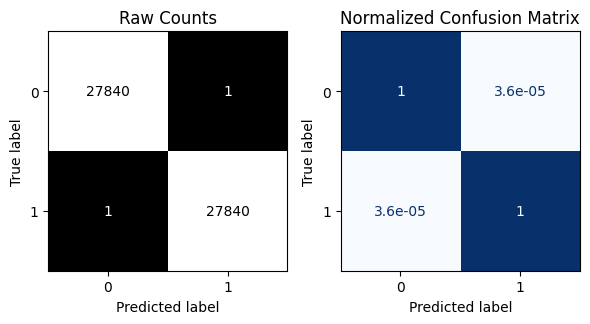


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      9268
           1       0.67      0.69      0.68      2930

    accuracy                           0.84     12198
   macro avg       0.79      0.79      0.79     12198
weighted avg       0.85      0.84      0.85     12198



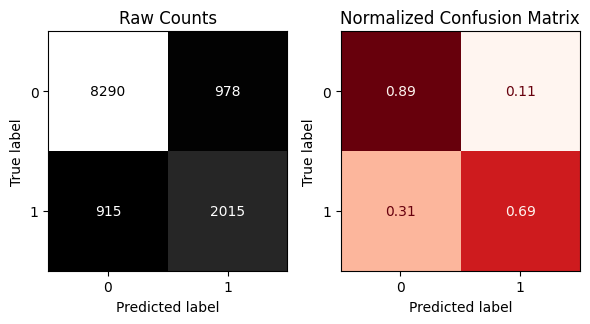

In [55]:
# Evaluate the default model
evaluate_classification(clf, X_train_sm, y_train_sm, X_test_processed, y_test)

## Extract and visualize the top 10 features using permutation importance

In [56]:
importances = clf.feature_importances_
importances

array([1.51990651e-01, 1.12915920e-01, 5.95886883e-02, 5.39182323e-02,
       1.51667601e-02, 8.65099566e-02, 1.81740386e-03, 3.49028426e-03,
       5.08807640e-03, 1.32385994e-07, 1.02856354e-02, 4.91895001e-03,
       8.29974096e-03, 3.84801214e-03, 7.11213716e-05, 2.22980521e-03,
       2.93893436e-03, 8.59501432e-04, 2.59569035e-04, 8.81013241e-04,
       3.20756617e-03, 1.38834704e-03, 2.28667298e-03, 2.60792959e-03,
       1.15991026e-02, 1.92861294e-03, 8.59129214e-03, 7.08654043e-03,
       4.46575904e-05, 3.89121611e-03, 5.69313379e-03, 8.27388539e-03,
       2.43103811e-04, 9.79418207e-02, 9.72839979e-04, 3.30280565e-02,
       1.95158793e-03, 2.13682255e-03, 2.03341813e-03, 6.27434653e-03,
       4.60827967e-05, 6.64747631e-03, 2.12512660e-02, 5.55467361e-03,
       4.03769113e-03, 4.20208611e-03, 1.28863362e-02, 1.40715190e-04,
       1.91351696e-02, 2.36696444e-03, 7.08650142e-03, 4.21907856e-03,
       4.71280525e-03, 5.45876275e-02, 2.23504727e-02, 2.65784077e-03,
      

In [57]:
feature_name = clf.feature_names_in_
importances = pd.Series(clf.feature_importances_ ,index = feature_name , name = "Feature Importance" )
importances

age                               0.151991
fnlwgt                            0.112916
educational-num                   0.059589
capital-gain                      0.053918
capital-loss                      0.015167
                                    ...   
native-country_Thailand           0.000051
native-country_Trinadad&Tobago    0.000053
native-country_United-States      0.009252
native-country_Vietnam            0.000219
native-country_Yugoslavia         0.000205
Name: Feature Importance, Length: 108, dtype: float64

In [58]:
importances.sort_values()

workclass_Never-worked                       1.323860e-07
native-country_Holand-Netherlands            4.618133e-07
native-country_Honduras                      1.384996e-05
native-country_Outlying-US(Guam-USVI-etc)    2.677938e-05
education_Preschool                          4.465759e-05
                                                 ...     
educational-num                              5.958869e-02
hours-per-week                               8.650996e-02
marital-status_Married-civ-spouse            9.794182e-02
fnlwgt                                       1.129159e-01
age                                          1.519907e-01
Name: Feature Importance, Length: 108, dtype: float64

In [59]:
sorted_importance = importances.sort_values(ascending= False)
top_10 = sorted_importance.head(10).index
top_10

Index(['age', 'fnlwgt', 'marital-status_Married-civ-spouse', 'hours-per-week',
       'educational-num', 'relationship_Husband', 'capital-gain',
       'marital-status_Never-married', 'relationship_Not-in-family',
       'occupation_Exec-managerial'],
      dtype='object')

## Do these features make sense based on the business case?
yes

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27841
           1       1.00      1.00      1.00     27841

    accuracy                           1.00     55682
   macro avg       1.00      1.00      1.00     55682
weighted avg       1.00      1.00      1.00     55682



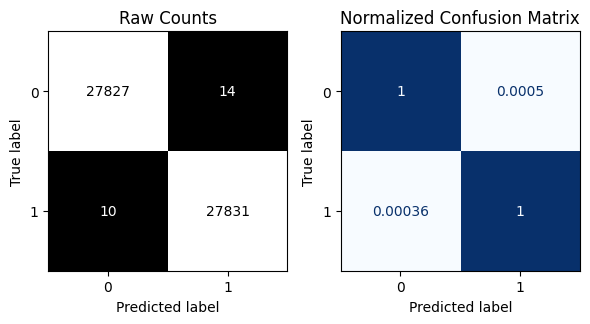


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      9268
           1       0.63      0.68      0.65      2930

    accuracy                           0.83     12198
   macro avg       0.76      0.78      0.77     12198
weighted avg       0.83      0.83      0.83     12198



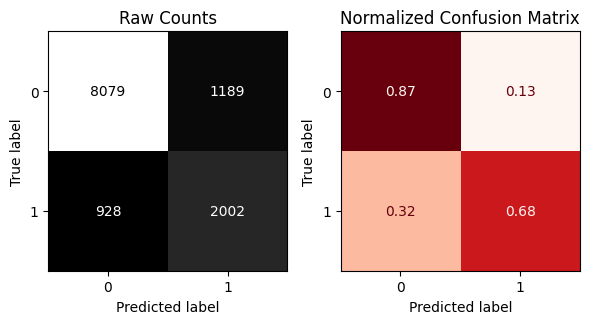

In [60]:

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train_sm[top_10], y_train_sm)


evaluate_classification(clf, X_train_sm[top_10],y_train_sm, X_test_processed[top_10], y_test)


**Select 2 out of the top 10 features from your permutation importances and produce explanatory visualizations showing the relationship between the feature and the target.**

In [61]:
#Boxplot for 'Hours-per-Week' vs 'Income'
plt.figure(figsize=(10, 6))

sns.boxplot(x='income', y='hours-per-week', data=df, palette='Set2')
plt.title('Boxplot of Hours-per-Week vs Income')
plt.xlabel('Income')
plt.ylabel('Hours-per-Week')
plt.show()




NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

In [62]:
#Boxplot for 'occupation' vs 'Income'
plt.figure(figsize=(10, 6))

sns.boxplot(x='income', y='occupation', data=df, palette='Set2')
plt.title('Boxplot of occupation vs Income')
plt.xlabel('Income')
plt.ylabel('occupation')
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

## Part 2

**Apply PCA to get 3 principal components for the data.**

In [63]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_sm)
X_test_pca = pca.transform(X_test_processed)
X_train_pca.head()

,pca0,pca1,pca2
0,-0.436800,-0.427175,0.061647
1,0.164421,0.342864,-0.745508
2,-0.107089,-0.556887,0.228071
3,-1.203277,-1.588143,1.686574
4,-0.677747,-0.804217,0.286243


In [64]:

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train_sm)

RandomForestClassifier(random_state=42)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27841
           1       1.00      1.00      1.00     27841

    accuracy                           1.00     55682
   macro avg       1.00      1.00      1.00     55682
weighted avg       1.00      1.00      1.00     55682



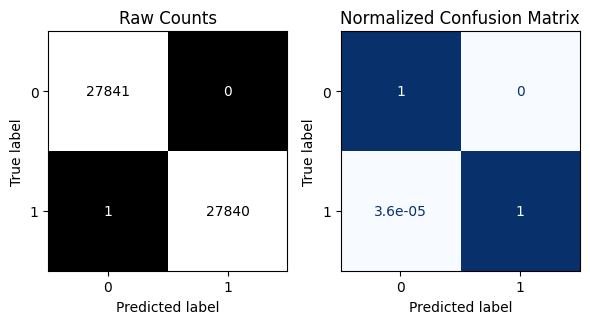


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      9268
           1       0.55      0.79      0.64      2930

    accuracy                           0.79     12198
   macro avg       0.73      0.79      0.75     12198
weighted avg       0.83      0.79      0.80     12198



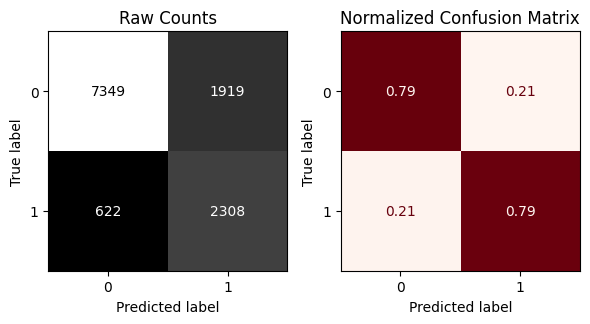

In [65]:
evaluate_classification(clf, X_train_pca,y_train_sm, X_test_pca, y_test)


## Apply clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

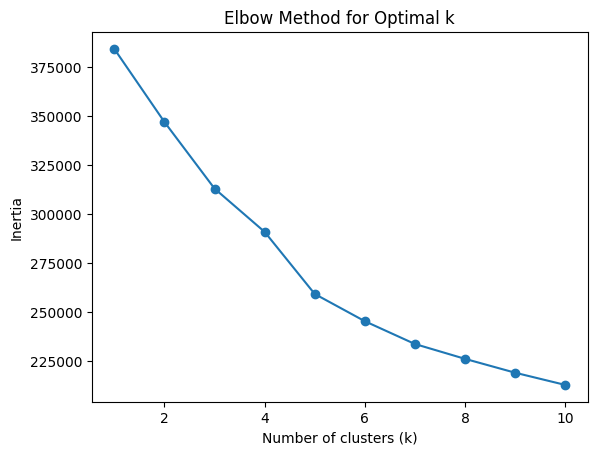

In [67]:
# Elbow plot (Elbow method)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_processed)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

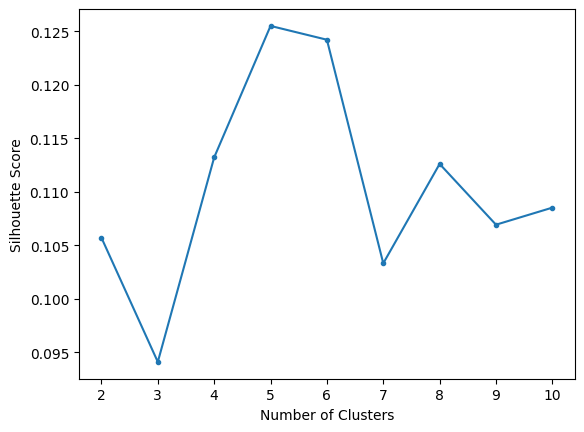

In [68]:
#Silhouette Score for KMeans
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i, n_init = 'auto', random_state = 42)
  kmeans.fit(X_train_processed)
  silhouette_scores.append(silhouette_score(X_train_processed, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [73]:
chosen_k = 5  # You can choose the appropriate k based on the elbow method
kmeans = KMeans(n_clusters=chosen_k, random_state=42)
kmeans.fit(X_train_processed)

# Step 3: Get predicted cluster labels for both training and test data
train_clusters = kmeans.predict(X_train_processed)
test_clusters = kmeans.predict(X_test_processed)

# Step 4: Concatenate/combine clusters with the original features
X_train_clustered = np.column_stack((X_train_processed, train_clusters))
X_test_clustered = np.column_stack((X_test_processed, test_clusters))

# # If you want to convert them back to pandas DataFrame
# columns = list(X_train.columns) + ['Cluster']
# df_train_clustered = pd.DataFrame(X_train_clustered, columns=columns)
# df_test_clustered = pd.DataFrame(X_test_clustered, columns=columns)

# # Now, df_train_clustered and df_test_clustered contain the original features along with cluster labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Create additional features by applying the feature engineering techniques demonstrated in the LP.**????

##
Fit and evaluate a model using your new features(**add by clustring**??) and compare it to your model from Part 1.



In [75]:
clf = RandomForestClassifier(random_state=42)

clf.fit(X_train_clustered, y_train)


RandomForestClassifier(random_state=42)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27841
           1       1.00      1.00      1.00      8751

    accuracy                           1.00     36592
   macro avg       1.00      1.00      1.00     36592
weighted avg       1.00      1.00      1.00     36592



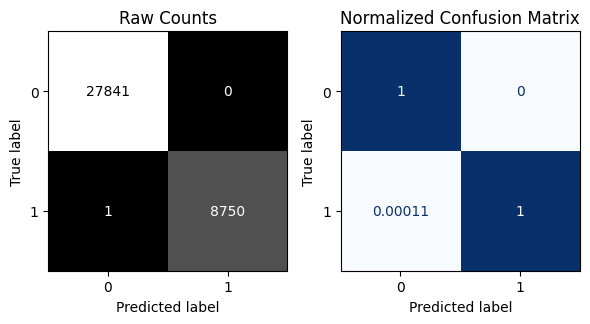


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      9268
           1       0.74      0.62      0.68      2930

    accuracy                           0.86     12198
   macro avg       0.82      0.78      0.79     12198
weighted avg       0.85      0.86      0.85     12198



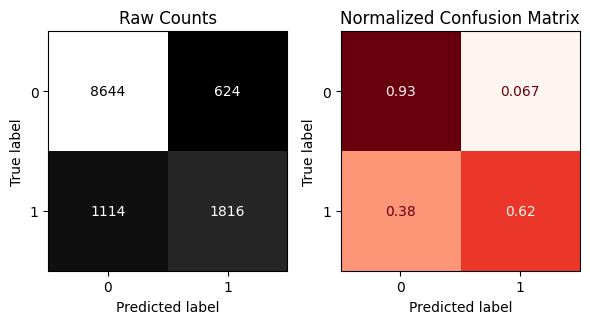

In [76]:
# Evaluate the default model
evaluate_classification(clf, X_train_clustered, y_train, X_test_clustered, y_test)

## Apply at least one method of feature selection (filtering, embedded, wrapper) to your new features including engineered data.

In [83]:
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train_clustered, y_train)

from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Create a VarianceThreshold instance
variance_threshold = 0.01  # You can adjust this threshold based on your preference
selector = VarianceThreshold(threshold=variance_threshold)

# Fit the selector on training data and transform both training and test data
X_train_selected = selector.fit_transform(X_train_clustered)
X_test_selected = selector.transform(X_test_clustered)


# Train a model on the selected features
clf.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred =clf.predict(X_test_selected)

# Get the selected features
# selected_features = np.array(X_train_clustered.columns)[selector.get_support()]
# print(f'Selected Features: {selected_features}')
selected_feature_indices = selector.get_support()
print(f'Selected Features Indices: {selected_feature_indices}')


Selected Features Indices: [ True  True  True  True  True  True  True  True  True False  True  True
  True  True False  True  True  True False  True  True  True  True  True
  True  True  True  True False  True  True  True False  True  True  True
  True  True  True  True False  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False  True False False
  True]


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27841
           1       1.00      1.00      1.00      8751

    accuracy                           1.00     36592
   macro avg       1.00      1.00      1.00     36592
weighted avg       1.00      1.00      1.00     36592



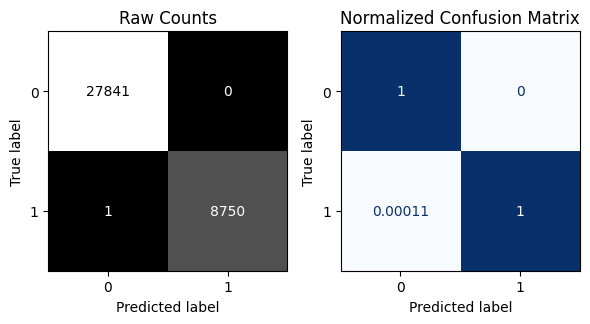


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      9268
           1       0.74      0.62      0.68      2930

    accuracy                           0.86     12198
   macro avg       0.81      0.78      0.79     12198
weighted avg       0.85      0.86      0.85     12198



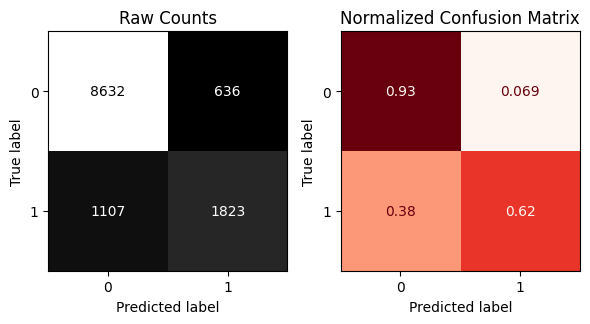

In [84]:
# Evaluate the default model
evaluate_classification(clf, X_train_selected, y_train, X_test_selected, y_test)

## Extract and visualize the top 10 features using permutation importance

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Assuming you have a trained model (model_part2) and X_test_selected from the previous example

# Calculate permutation importance
perm_importance = permutation_importance(clf, X_test_selected, y_test, n_repeats=30, random_state=42)

# Get feature names
feature_names = np.array(X_train_clustered.columns)[selected_feature_indices]

# Get indices of top 10 features
top_10_indices = np.argsort(perm_importance.importances_mean)[-10:]

# Plot permutation importance
plt.barh(range(10), perm_importance.importances_mean[top_10_indices], xerr=perm_importance.importances_std[top_10_indices])
plt.yticks(range(10), feature_names[top_10_indices])
plt.xlabel('Permutation Importance')
plt.title('Top 10 Features - Permutation Importance')
plt.show()
